In [1]:
# %load_ext lab_black

In [2]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
# read in data
df = pd.read_csv("train.csv")

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#rename headers

df = df.rename(columns = {
    "PassengerId": "passenger_id",
    "Survived": "survived",
    "Pclass": "ticket_class",
    "Name": "name",
    "Sex": "sex",
    "Age": "age",
    "SibSp": "siblings_spouses",
    "Parch": "parents_children",
    "Ticket": "ticket_num",
    "Fare": "fare",
    "Cabin": "cabin",
    "Embarked": "embarked_port"
}).sort_values(by='fare')

df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S


In [7]:
#count NaNs

df.isna().sum()

passenger_id          0
survived              0
ticket_class          0
name                  0
sex                   0
age                 177
siblings_spouses      0
parents_children      0
ticket_num            0
fare                  0
cabin               687
embarked_port         2
dtype: int64

In [36]:
# Fill cabin NaNs 

pd.set_option('display.max_rows', None)

dict = df.to_dict(orient='dict')

# print(dict)

# df['cabin'] = df['cabin'].fillna(method = 'ffill')

# df['cabin'] = df['cabin'].fillna('D85', limit = 1)

# df['cabin'].unique()
# df['fare'].unique()
# df['fare'].value_counts()
# df.groupby(df['fare']).count().sort_values(by = 'fare')
# df['ticket_class'].unique()
# data = pd.cut(df['fare'], bins = [0, 8, 12, 870], labels = ['3rd', '2nd', '1st'])

# fare_group = []

for key, value in dict.items():
    if key == 'fare':
        fare_group.append(value)
    else:
        pass
        
# for i in fare_group:
#     for f in i:
#         f = int(f)
        
# for i in fare_group:
#     for f in i:
# #     print(i)
# # #     if pd.isna(f):
# # #         df['fare_group'] = 'NULL'
#         if f < 9:
#             fare_group.append('3rd')
#         elif f < 12:
#             fare_group.append('2nd')
#         else:
#             fare_group.append('1st')
# #     print(i.dtype)
# #     print(f)

# print('test')    
print(fare_group)


[271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
413      0.0000
674      0.0000
263      0.0000
466      0.0000
732      0.0000
179      0.0000
806      0.0000
481      0.0000
822      0.0000
815      0.0000
378      4.0125
872      5.0000
326      6.2375
843      6.4375
818      6.4500
371      6.4958
202      6.4958
654      6.7500
143      6.7500
411      6.8583
825      6.9500
129      6.9750
804      6.9750
477      7.0458
611      7.0500
884      7.0500
131      7.0500
465      7.0500
210      7.0500
363      7.0500
784      7.0500
721      7.0542
631      7.0542
243      7.1250
590      7.1250
433      7.1250
761      7.1250
127      7.1417
354      7.2250
553      7.2250
598      7.2250
522      7.2250
875      7.2250
661      7.2250
244      7.2250
693      7.2250
19       7.2250
203      7.2250
773      7.2250
26       7.2250
798      7.2292
780      7.2292
524      7.2292
531      7.2292
532      7.2292
60       7.2292
762      7.2292
568    

In [9]:
df['cabin'] = df['cabin'].str[:1]

In [10]:
df['cabin']

271    NaN
597    NaN
302    NaN
633    NaN
277    NaN
413    NaN
674    NaN
263      B
466    NaN
732    NaN
179    NaN
806      A
481    NaN
822    NaN
815      B
378    NaN
872      B
326    NaN
843    NaN
818    NaN
371    NaN
202    NaN
654    NaN
143    NaN
411    NaN
825    NaN
129    NaN
804    NaN
477    NaN
611    NaN
884    NaN
131    NaN
465    NaN
210    NaN
363    NaN
784    NaN
721    NaN
631    NaN
243    NaN
590    NaN
433    NaN
761    NaN
127    NaN
354    NaN
553    NaN
598    NaN
522    NaN
875    NaN
661    NaN
244    NaN
693    NaN
19     NaN
203    NaN
773    NaN
26     NaN
798    NaN
780    NaN
524    NaN
531    NaN
532    NaN
60     NaN
762    NaN
568    NaN
57     NaN
352    NaN
367    NaN
36     NaN
832    NaN
859    NaN
296    NaN
376    NaN
470    NaN
0      NaN
94     NaN
365    NaN
592    NaN
320    NaN
250    NaN
227    NaN
212    NaN
785    NaN
491    NaN
425    NaN
154    NaN
514    NaN
786    NaN
663    NaN
478    NaN
845    NaN
648    NaN
649    NaN

In [11]:
# Replace NaNs in age with average

# df['age'].mean()
# df['age'].median()

df['age'] = df['age'].fillna(29.7)

df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.7,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.7,0,0,239853,0.0,NaN,S


In [12]:
# Fill in embarked port NaNs randomly

df['embarked_port'] = df['embarked_port'].fillna(method = 'ffill')

In [13]:
#count NaNs

df.isna().sum()

passenger_id          0
survived              0
ticket_class          0
name                  0
sex                   0
age                   0
siblings_spouses      0
parents_children      0
ticket_num            0
fare                  0
cabin               687
embarked_port         0
dtype: int64

In [14]:
#check outputs 
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

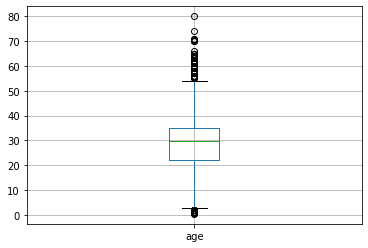

In [15]:
df.boxplot(column = 'age')

In [16]:
# create bins for age

df['age_bucket'] = pd.qcut(df['age'], 5)

In [17]:
df['age_bucket'].value_counts()

(28.0, 29.7]     199
(20.0, 28.0]     183
(0.419, 20.0]    179
(38.0, 80.0]     177
(29.7, 38.0]     153
Name: age_bucket, dtype: int64

In [18]:
# Create plots showing difference in survival rates by age

# ax = df.plot.bar(x='age_bucket', y='survived', rot=0)

# if survived == 0:
#     df.hist(bins=3)


In [19]:
df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port,age_bucket
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,"(20.0, 28.0]"
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,"(38.0, 80.0]"
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,"(0.419, 20.0]"
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.7,0,0,112052,0.0,NaN,S,"(28.0, 29.7]"
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.7,0,0,239853,0.0,NaN,S,"(28.0, 29.7]"


In [20]:
# Drop unused columns
df = df.drop(['passenger_id', 'name', 'age_bucket', 'ticket_num'], axis = 1)
# df = df.drop(['passenger_id'], axis = 1)
# df = df.drop(['name'], axis = 1)
# df = df.drop(['age_bucket'], axis = 1)

In [21]:
# Reconfigure ticket_class 
df = df.assign(ticket_class=lambda df: df["ticket_class"].replace({1: "First", 2: "Second", 3: "Third"}))

In [22]:
# Set target

target = df["survived"]

y = target
X = df.drop(['survived'], axis=1)

In [23]:
X.columns

Index(['ticket_class', 'sex', 'age', 'siblings_spouses', 'parents_children',
       'fare', 'cabin', 'embarked_port'],
      dtype='object')

In [24]:
y[:5]

271    1
597    0
302    0
633    0
277    0
Name: survived, dtype: int64

In [25]:
X.columns

Index(['ticket_class', 'sex', 'age', 'siblings_spouses', 'parents_children',
       'fare', 'cabin', 'embarked_port'],
      dtype='object')

In [26]:
# Original - all features - scores around 80 
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare", "age", "siblings_spouses", "parents_children"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin", "embarked_port"]),
#     ]
# )

# V1 - scores around 77
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare", "age"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )

# V2 - scores around 76
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex"]),
#     ]
# )


# V3
cf = ColumnTransformer(
    [
        ("numerical", "passthrough", ["fare", "age"],),
        ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
    ]
)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [28]:
# Dummy Classifier

d_pipeline = make_pipeline(cf, DummyClassifier())
d_pipeline.fit(X_train, y_train)
y_test_pred_dc = d_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_dc))

ValueError: Input contains NaN

In [ ]:
# accuracy score for Dummy Classifier

accuracy_score(y_test, y_test_pred_dc)

In [ ]:
# Logistic Regression Model

lr_pipeline = make_pipeline(cf, LogisticRegression(max_iter=1000))
lr_pipeline.fit(X_train, y_train)
y_test_pred_lr = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_lr))

In [ ]:
# accuracy score for Logistic Regression Model

accuracy_score(y_test, y_test_pred_lr)

In [ ]:
# Decision Tree Model (unpruned)

dt_pipeline = make_pipeline(cf, DecisionTreeClassifier())
dt_pipeline.fit(X_train, y_train)
y_test_pred_dt = dt_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_dt))

In [ ]:
# accuracy score for decision tree model (unpruned)

accuracy_score(y_test, y_test_pred_dt)

In [ ]:
# Random Forest Model

rf_pipeline = make_pipeline(cf, RandomForestClassifier(n_estimators=10000))
rf_pipeline.fit(X_train, y_train)
y_test_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_rf))

In [ ]:
# accuracy score for random forest model 

accuracy_score(y_test, y_test_pred_rf)